In [35]:
# Libraries
library(ggplot2)
library(phyloseq)
library(vegan)
library(MGnifyR)
options(repr.plot.width = 16,repr.plot.height=8)


Loading required package: permute

Loading required package: lattice

This is vegan 2.5-6



# MGnifyR - using MGnify data in R

## EBI Metagenomics workshop 2021

### ben.allen@ncl.ac.uk

# Introduction

## Aims of the talk

  - Introduce current fuctionality
      - In processing *order*.
      

  - Get feedback!
      - might this be useful to *you*
      - what would *you* want to see?
      
  

## Aims of the package
  - Simplify access to the data for R users.
  - Familiar R friendly `data.frames`.
  - No dictating analysis workflow.
  


  - Only data retrieval, *not* analysis...
  - ..but making the analysis easier.

## Current status
  - Functionaly useful
  - Many issues - active development
      - R based *and* server side.
      - help us find them.
  

In particular, is it right to use phyloseq? What else would be generally useful?

aMotivation 
  - R friendly way to access the API
  - JSONAPI can be daunting for non-programmers
  - Limited ability to ~combine~ datasets together.
  
  
  Important to keep it as simple as possible - not a fan of creating specific object types and methods. 
  
  Issues mix of R side and server side API. 

# MGnifyR overview
 - Set of wrapper functions.
     - Data search and data retrieval.
     - *Consistent* parameters and style(?)
     - Process arbitrary collections studies/samples/assemblies together
     

 - **Uses `analyses` accessions to identify data.**
     - Helper functions for conversion.
     

 - Hides API complexity
    - pagination, authentication, etc.
    

 - Local caching
    - significant speedups.
    

 - Help
    - `?function_name` 
    - Walkthrough vignette
    - Tab completion is your friend. 
 

# Installation
 - Requirements:
    - `devtools`
    - `phyloseq` - https://joey711.github.io/phyloseq

`install_github("beadyallen/MGnifyR")`

In [1]:
devtools::install_github("beadyallen/MGnifyR", upgrade = F, force = T)

✔  checking for file ‘/tmp/Rtmp1EA1hT/remotes3ea376cf0068/beadyallen-MGnifyR-d1baca9/DESCRIPTION’
─  preparing ‘MGnifyR’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
     an installed package
─  building ‘MGnifyR_0.1.0.tar.gz’
   


Installing package into ‘/home/ben/R/x86_64-redhat-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)



# 0 - `mgnify_client` object

   - Required by all `MGnifyR` functions
     - cache location
     - username/password authentication
     - debug options

In [2]:
library(MGnifyR)
mgnify_client()


An object of class "mgnify_client"
Slot "url":
[1] "https://www.ebi.ac.uk/metagenomics/api/v1"

Slot "authtok":
[1] NA

Slot "cache_dir":
[1] NA

Slot "warnings":
[1] FALSE

Slot "use_memcache":
[1] FALSE

Slot "memcache":
list()

Slot "clear_cache":
[1] FALSE


### Using authentication

 -  `username`/`password` combination

In [3]:
mgnify_client(username = "Webin-44662", password = mypassword, usecache = T)


ERROR: Error in mgnify_client(username = "Webin-44662", password = mypassword, : object 'mypassword' not found


### Using the local query cache

   - API results saved on your local harddrive.
   - *Raw* api results. 
       -post de-pagination.
   - **MUCH** faster after initial download.
   - Persistent across sessions
   - *Somewhat* threadsafe...
   - Not for all cases.
   

In [8]:
mgnify_client(usecache = T)

An object of class "mgnify_client"
Slot "url":
[1] "https://www.ebi.ac.uk/metagenomics/api/v1"

Slot "authtok":
[1] NA

Slot "cache_dir":
[1] "/home/ben/Jupyter Workbooks/.MGnifyR_cache"

Slot "warnings":
[1] FALSE

Slot "use_memcache":
[1] FALSE

Slot "memcache":
list()

Slot "clear_cache":
[1] FALSE


In [9]:
(mg <- mgnify_client(usecache = T, cache_dir = '~/MyLocalMGnifyCache'))


An object of class "mgnify_client"
Slot "url":
[1] "https://www.ebi.ac.uk/metagenomics/api/v1"

Slot "authtok":
[1] NA

Slot "cache_dir":
[1] "~/MyLocalMGnifyCache"

Slot "warnings":
[1] FALSE

Slot "use_memcache":
[1] FALSE

Slot "memcache":
list()

Slot "clear_cache":
[1] FALSE


Actual cache usage controlable at the query level. 

#### Cache example


In [10]:
search_result <- mgnify_analyses_from_studies(mg, "MGYS00005605", usecache = F)


  |======================================================================| 100%


In [12]:
search_result <- mgnify_analyses_from_studies(mg, "MGYS00005605", usecache = T)

  |======================================================================| 100%


## Common `MGnifyR` function parameters
   - `client` : `mgnify_client` object
   - `accession` : single or multiple accessions (character vector)
   - `maxhits` : how many entries to return for an API query.
   - `usecache`: Enable/disable local caching.
   - `asDataFrame`: Convert results to a single `data.frame` or return an unprocessed list

## 1 - `mgnify_query` - finding MGnify projects and results

 - General search functionality
 - Flexible filtering
 
`mgnify_query(client, qtype, accession, asDataFrame, maxhits, usecache, ...)`

  - `qtype`: "studies", "samples", etc. What to search for?
  - `accession`:  Single accession of interest.
  

  - `...` Extra filtering parameters.
  

  - Returns `data.frame` of results.
  - Caching **OFF** by default

In [13]:
mgnify_query(mg, qtype="samples", maxhits=10, usecache = T)

biosample,accession,analysis-completed,geo-loc-name,sample-desc,sample-name,sample-alias,host-tax-id,species,last-update,⋯,photosynthetically active radiation,potential density,project name,environment (feature),elevation,ENA checklist,host scientific name,host genotype,host phenotype,host sex
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
SAMN01795786,SRS373032,2016-03-15,missing,Generic sample from unclassified Bacteria (miscellaneous),PRJNA218187.11681_ST_14_1,PRJNA218187.11681_ST_14_1,9606,Homo sapiens,2021-10-22T18:11:19,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
SAMN03392605,SRS875056,NA,NA,Water phase of 2 ppm; 30Âµm median dispersed oil in unfiltered seawater,2013-0164,2013-0164,NA,NA,2021-10-22T18:02:20,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
SAMN03392596,SRS874730,NA,NA,Water phase of 2 ppm; 10Âµm median dispersed oil in unfiltered seawater,2013-0124,2013-0124,NA,NA,2021-10-22T17:48:04,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
SAMN15699246,SRS7452828,NA,NA,This sample has been submitted by pda|benjamin.marie1978@gmail.com on 2020-10-01; Microcystis aeruginosa PMC 728.11,Microcystis aeruginosa PMC 728.11 genome,Microcystis aeruginosa PMC 728.11 genome,NA,NA,2021-10-22T17:45:43,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
SAMN09489426,SRS3481351,NA,NA,Bacterial DNA sequence reads from human saliva,Metagenome,Metagenome,9606,NA,2021-10-22T17:36:31,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
SAMN02628402,SRS567311,2014-05-09,Western Tropical North Atlantic Ocean,This sample has been submitted by pda|brando02345 on 2014-03-13; aquatic metagenome,ACM18,ACM18,NA,NA,2021-10-22T17:25:36,⋯,65.38,18.97,NA,NA,NA,NA,NA,NA,NA,NA
SAMEA5989477,ERS3792294,NA,NA,REHAB,RH0001-DID-DW-100-AUT,RH0001-DID-DW-100-AUT,NA,NA,2021-10-22T16:38:30,⋯,NA,NA,REHAB,Sediment,0.0,ERC000021,NA,NA,NA,NA
SAMN02393652,SRS500400,2017-11-01,Canada: Ontario,Metagenomic library of activated sludge from pulp and paper waste treatment plant (CX4),CX4,CX4,NA,NA,2021-10-22T00:34:22,⋯,NA,NA,Libraries for functional screening,NA,NA,NA,NA,NA,NA,NA
SAMN02324088,SRS493612,2017-11-01,Canada,Metagenomic library from agricultural soil (12AC),12AC,12AC,NA,NA,2021-10-22T00:32:54,⋯,NA,NA,Libraries for functional screening,NA,NA,NA,NA,NA,NA,NA


Columns are concatenated - lots of NAs

Notes about the "maxhits" parameter 
   - stops at pagination boundaries
   - Get more results than expected.
   
   Discuss caching queries - generally not advised because new results added all the time.

In [14]:
d <- mgnify_query(mg, qtype = "studies", maxhits=10, usecache = T)
colnames(d)

[1] "bioproject"          "samples-count"       "accession"          
 [4] "secondary-accession" "centre-name"         "is-public"          
 [7] "study-abstract"      "study-name"          "data-origination"   
[10] "last-update"         "acc_type"            "type"

### Using filters (...)

 - Server side result filtering
     - See help (`?`)
 

Need to do this because retrieving ALL samples to then post-filter is too difficult. Interface could be better though.

 - Studies:
   - accession, biome_name, lineage, centre_name
 - Samples:
   - accession, experiment_type, biome_name lineage, geo_loc_name, latitude_gte, latitude_lte, longitude_gte, longitude_lte, species, instrument_model, instrument_platform, **metadata_key, metadata_value_gte, metadata_value_lte, metadata_value**, environment_material, environment_feature, study_accession
 - Runs
   - accession, experiment_type, biome_name, lineage, species, instrument_platform, instrument_model

In [15]:
mgnify_query(mg, qtype = "analyses", experiment_type="amplicon", usecache = T)

pipeline-version,analysis-summary.key,analysis-summary.value,analysis-summary.key.1,analysis-summary.value.1,analysis-summary.key.2,analysis-summary.value.2,analysis-summary.key.3,analysis-summary.value.3,analysis-summary.key.4,⋯,analysis-status,experiment-type,complete-time,instrument-platform,instrument-model,acc_type,sample,study,run,type
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
5.0,Submitted nucleotide sequences,55799,Nucleotide sequences after format-specific filtering,55789,Nucleotide sequences after length filtering,55789,Nucleotide sequences after undetermined bases filtering,55789,Predicted SSU sequences,⋯,completed,amplicon,2020-06-11T10:51:27,ILLUMINA,Illumina MiSeq,analysis-jobs,ERS2075820,MGYS00002115,ERR2237853,analysis-jobs
5.0,Submitted nucleotide sequences,905,Nucleotide sequences after format-specific filtering,889,Nucleotide sequences after length filtering,889,Nucleotide sequences after undetermined bases filtering,889,Predicted SSU sequences,⋯,completed,amplicon,2020-11-05T20:43:04,ILLUMINA,Illumina MiSeq,analysis-jobs,SRS3051409,MGYS00005251,SRR6843879,analysis-jobs
5.0,Submitted nucleotide sequences,931,Nucleotide sequences after format-specific filtering,899,Nucleotide sequences after length filtering,899,Nucleotide sequences after undetermined bases filtering,899,Predicted SSU sequences,⋯,completed,amplicon,2020-11-05T20:43:23,ILLUMINA,Illumina MiSeq,analysis-jobs,SRS3051412,MGYS00005251,SRR6843877,analysis-jobs
5.0,Submitted nucleotide sequences,965,Nucleotide sequences after format-specific filtering,939,Nucleotide sequences after length filtering,939,Nucleotide sequences after undetermined bases filtering,939,Predicted SSU sequences,⋯,completed,amplicon,2020-11-05T20:04:56,ILLUMINA,Illumina MiSeq,analysis-jobs,SRS3051410,MGYS00005251,SRR6843876,analysis-jobs
5.0,Submitted nucleotide sequences,872,Nucleotide sequences after format-specific filtering,837,Nucleotide sequences after length filtering,837,Nucleotide sequences after undetermined bases filtering,837,Predicted SSU sequences,⋯,completed,amplicon,2020-11-05T21:30:23,ILLUMINA,Illumina MiSeq,analysis-jobs,SRS3051414,MGYS00005251,SRR6843872,analysis-jobs
5.0,Submitted nucleotide sequences,173961,Nucleotide sequences after format-specific filtering,162050,Nucleotide sequences after length filtering,162050,Nucleotide sequences after undetermined bases filtering,162050,Predicted SSU sequences,⋯,completed,amplicon,2020-11-15T15:10:44,ILLUMINA,Illumina HiSeq 2500,analysis-jobs,SRS2217638,MGYS00005169,SRR5586556,analysis-jobs
5.0,Submitted nucleotide sequences,307808,Nucleotide sequences after format-specific filtering,285952,Nucleotide sequences after length filtering,285952,Nucleotide sequences after undetermined bases filtering,285952,Predicted SSU sequences,⋯,completed,amplicon,2020-11-15T09:20:08,ILLUMINA,Illumina HiSeq 2500,analysis-jobs,SRS2217644,MGYS00005169,SRR5586551,analysis-jobs
5.0,Submitted nucleotide sequences,74600,Nucleotide sequences after format-specific filtering,74581,Nucleotide sequences after length filtering,74581,Nucleotide sequences after undetermined bases filtering,74581,Predicted SSU sequences,⋯,completed,amplicon,2020-03-11T11:35:39,ILLUMINA,Illumina MiSeq,analysis-jobs,ERS2075827,MGYS00002115,ERR2237860,analysis-jobs
5.0,Submitted nucleotide sequences,74114,Nucleotide sequences after format-specific filtering,74090,Nucleotide sequences after length filtering,74090,Nucleotide sequences after undetermined bases filtering,74090,Predicted SSU sequences,⋯,completed,amplicon,2020-03-11T11:42:55,ILLUMINA,Illumina MiSeq,analysis-jobs,ERS2075825,MGYS00002115,ERR2237858,analysis-jobs


In [16]:
(forest_samples <- mgnify_query(mg, qtype="samples", environment_feature="forest", usecache = T))

longitude,biosample,latitude,accession,collection-date,sample-desc,environment-biome,environment-feature,environment-material,sample-name,⋯,acc_type,biome,type,depth,host sex,investigation type,environmental package,sequencing method,elevation,ENA checklist
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
140.3906,SAMD00204400,38.1614,DRS147839,2018-07-16,"Fungal meta-barcoding of plant root tips, Q.crispula corrected from plots without P.japonica and P.subaphylla 08, kin4-1D",temperate forest,forest,root tip,SAMD00204400,⋯,samples,root:Host-associated:Plants:Root,samples,NA,NA,NA,NA,NA,NA,NA
130.56,SAMD00253331,30.24,DRS159478,2017-10-07,"Fungal meta-barcoding of Apostasia wallichii var. nipponica root tip 3A_Yakushima, Onoaida, Futamatagawa_Yakushima, Onoaida, Futamatagawa",temperate forest,forest,root tip,SAMD00253331,⋯,samples,root:Host-associated:Plants:Root,samples,NA,NA,NA,NA,NA,NA,NA
131.37,SAMD00253335,31.71,DRS159482,2009-09-15,Fungal meta-barcoding of Apostasia wallichii var. nipponica root tip 1A_Miyazaki_Miyazaki,temperate forest,forest,root tip,SAMD00253335,⋯,samples,root:Host-associated:Plants:Root,samples,NA,NA,NA,NA,NA,NA,NA
131.37,SAMD00253348,31.71,DRS159495,2009-09-15,Fungal meta-barcoding of Apostasia wallichii var. nipponica root tip 6C_Miyazaki_Miyazaki,temperate forest,forest,root tip,SAMD00253348,⋯,samples,root:Host-associated:Plants:Root,samples,NA,NA,NA,NA,NA,NA,NA
140.3907,SAMD00204377,38.1608,DRS147816,2018-07-16,"Fungal meta-barcoding of plant root tips, Q.crispula corrected from plots without P.japonica and P.subaphylla 05, kin3-12E",temperate forest,forest,root tip,SAMD00204377,⋯,samples,root:Host-associated:Plants:Root,samples,NA,NA,NA,NA,NA,NA,NA
140.3905,SAMD00204378,38.161,DRS147817,2018-07-16,"Fungal meta-barcoding of plant root tips, Q.crispula corrected from plots without P.japonica and P.subaphylla 06, kin3-12F",temperate forest,forest,root tip,SAMD00204378,⋯,samples,root:Host-associated:Plants:Root,samples,NA,NA,NA,NA,NA,NA,NA
140.3911,SAMD00204380,38.16,DRS147819,2018-07-16,"Fungal meta-barcoding of plant root tips, Q.crispula corrected from plots without P.japonica and P.subaphylla 02, kin3-1B",temperate forest,forest,root tip,SAMD00204380,⋯,samples,root:Host-associated:Plants:Root,samples,NA,NA,NA,NA,NA,NA,NA
140.3907,SAMD00204384,38.1608,DRS147823,2018-07-16,"Fungal meta-barcoding of plant root tips, Q.crispula corrected from plots without P.japonica and P.subaphylla 05, kin3-1F",temperate forest,forest,root tip,SAMD00204384,⋯,samples,root:Host-associated:Plants:Root,samples,NA,NA,NA,NA,NA,NA,NA
140.3907,SAMD00204386,38.1608,DRS147825,2018-07-16,"Fungal meta-barcoding of plant root tips, Q.crispula corrected from plots without P.japonica and P.subaphylla 05, kin3-1H",temperate forest,forest,root tip,SAMD00204386,⋯,samples,root:Host-associated:Plants:Root,samples,NA,NA,NA,NA,NA,NA,NA


#### `metadata_keys / values`
- filtering by "arbitrary" metadata.
- Quality "variable".

- doesn't always work as expected.
  - pH - `metadata_key="pH", metadata_value_lte="7.0"`

In [17]:
result_pH <- mgnify_query(mg, metadata_key="pH", metadata_value_lte="7.0", usecache = T)
result_pH$pH

[1] "8.195" "8.133" "8.01"  "8.121" "7.983" "8.084" "9.8"   "8.35"  "8.35" 
 [10] "8.52"  "8.52"  "6.7"   "6.7"   "6.7"   "6.7"   "6.7"   "6.7"   "6.7"  
 [19] "6.7"   "7.4"   "7.4"   "7.4"   "7.4"   "7.4"   "7.4"   "6.5"   "6.5"  
 [28] "6.5"   "6.5"   "6.5"   "6.5"   "6.5"   "6.5"   "6.5"   "6.5"   "5.4"  
 [37] "5.4"   "5.4"   "5.4"   "5.4"   "5.4"   "5.4"   "5.4"   "5.4"   "5.4"  
 [46] "5.4"   "5.4"   "5.6"   "5.6"   "5.6"   "5.6"   "5.6"   "5.6"   "5.6"  
 [55] "5.6"   "5.6"   "5.6"   "5.6"   "5.6"   "5.6"   "5.6"   "5.6"   "5.6"  
 [64] "6.7"   "6.7"   "6.7"   "6.7"   "6.7"   "6.7"   "6.7"   "6.7"   "6.7"  
 [73] "6.7"   "6.7"   "6.7"   "6.7"   "6.7"   "7.4"   "7.4"   "7.4"   "7.4"  
 [82] "7.4"   "7.4"   "7.4"   "7.4"   "7.4"   "7.4"   "7.4"   "6.5"   "6.5"  
 [91] "6.5"   "6.5"   "6.5"   "6.5"   "6.5"   "6.5"   "6.5"   "6.5"   "6.5"  
[100] "6.5"   "6.5"   "6.5"   "6.5"   "6.5"   "5.4"   "5.4"   "5.4"   "5.4"  
[109] "5.4"   "5.4"   "5.4"   "5.4"   "5.6"   "5.6"   "5.6"   "5.6"   "5.6"  
[118] "5.6"   "6.7"   "6.7"   "7.4"   "7.4"   "7.4"   "7.4"   "7.4"   "7.4"  
[127] "7.4"   "7.4"   "7.4"   "6.5"   "6.5"   "6.5"   "6.5"   "6.5"   "6.5"  
[136] "5.4"   "5.4"   "5.6"   "5.6"   "5.6"   "5.6"   "6.7"   "6.7"   "6.7"  
[145] "6.7"   "7.4"   "7.4"   "7.4"   "7.4"   "7.4"   "6.5"   "6.5"   "5.4"  
[154] "5.4"   "5.4"   "5.4"   "5.4"   "5.4"   "5.6"   "5.6"   "5.6"   "5.6"  
[163] "5.6"   "5.6"   "6.7"   "6.7"   "6.7"   "6.7"   "6.7"   "6.7"   "6.7"  
[172] "6.7"   "6.7"   "6.7"   "6.7"   "6.7"   "6.7"   "6.7"   "7.4"   "7.4"  
[181] "7.4"   "7.4"   "7.4"   "7.4"   "7.4"   "6.5"   "6.5"   "6.5"   "6.5"  
[190] "6.5"   "6.5"   "6.5"   "6.5"   "5.4"   "5.4"   "5.4"   "5.4"   "5.4"  
[199] "5.4"   "5.4"   "5.4"   "5.4"   "5.4"   "5.6"   "5.6"   "5.6"   "5.6"  
[208] "6.7"   "6.7"   "6.7"   "6.7"   "6.7"   "6.7"   "7.4"   "7.4"   "7.4"  
[217] "7.4"   "7.4"   "6.5"   "6.5"   "6.5"   "6.5"   "6.5"   "6.5"   "5.4"

## 2 - Converting to `analyses`
  
  - MGnify results associated with `analysis` accessions.
  - `mgnify_analysis_from_xxx` to convert from `studies` and `samples`
    - More required?
  - *Not* necessarily 1 to 1 relationship.
  
    
  

In [18]:

samp_acc <- forest_samples$accession
samp_acc

[1] "DRS147839"  "DRS159478"  "DRS159482"  "DRS159495"  "DRS147816" 
  [6] "DRS147817"  "DRS147819"  "DRS147823"  "DRS147825"  "DRS147826" 
 [11] "DRS147827"  "DRS147828"  "DRS147829"  "DRS147830"  "DRS147831" 
 [16] "DRS147837"  "DRS147838"  "DRS147840"  "DRS147842"  "DRS147844" 
 [21] "DRS159475"  "DRS159476"  "DRS159477"  "DRS159479"  "DRS159481" 
 [26] "DRS159494"  "DRS159483"  "DRS159488"  "DRS159484"  "DRS159486" 
 [31] "DRS159491"  "DRS159492"  "DRS159497"  "DRS161771"  "DRS161772" 
 [36] "DRS161773"  "DRS161775"  "DRS161776"  "DRS161777"  "DRS161780" 
 [41] "DRS161782"  "DRS173113"  "DRS173114"  "DRS173116"  "DRS173119" 
 [46] "DRS173120"  "DRS146960"  "DRS146987"  "DRS146995"  "DRS146999" 
 [51] "DRS147008"  "DRS147012"  "DRS147026"  "DRS147034"  "DRS147038" 
 [56] "DRS147800"  "DRS147808"  "DRS147811"  "DRS147812"  "DRS147815" 
 [61] "DRS159493"  "DRS161778"  "DRS146951"  "DRS146954"  "DRS146958" 
 [66] "DRS146972"  "DRS146981"  "DRS146986"  "DRS146989"  "DRS146993" 
 [71] "DRS146994"  "DRS147000"  "DRS147001"  "DRS147010"  "DRS147015" 
 [76] "DRS147020"  "DRS147043"  "DRS147050"  "DRS147051"  "DRS147056" 
 [81] "DRS147059"  "DRS147065"  "DRS147069"  "DRS147071"  "DRS147092" 
 [86] "DRS147096"  "DRS147104"  "DRS147784"  "DRS147788"  "DRS147803" 
 [91] "DRS147809"  "DRS147002"  "DRS147004"  "DRS147017"  "DRS147022" 
 [96] "DRS147024"  "DRS147044"  "DRS147048"  "DRS147064"  "DRS147070" 
[101] "DRS147077"  "DRS147080"  "DRS147084"  "DRS147089"  "DRS147090" 
[106] "DRS147094"  "DRS147097"  "DRS147102"  "DRS147105"  "DRS147112" 
[111] "DRS147789"  "DRS147795"  "DRS147801"  "DRS147810"  "DRS146952" 
[116] "DRS146955"  "DRS146961"  "DRS146962"  "DRS146969"  "DRS146975" 
[121] "DRS146977"  "DRS146983"  "DRS146997"  "DRS146998"  "DRS147019" 
[126] "DRS147025"  "DRS147036"  "DRS147054"  "DRS147066"  "DRS147082" 
[131] "DRS147086"  "DRS147093"  "DRS147099"  "DRS147103"  "DRS147108" 
[136] "DRS147110"  "DRS147783"  "DRS147791"  "DRS147799"  "DRS147813" 
[141] "DRS147814"  "DRS146973"  "DRS146988"  "DRS147023"  "DRS147091" 
[146] "DRS147095"  "DRS147111"  "DRS147786"  "DRS146956"  "DRS146964" 
[151] "DRS146971"  "DRS146979"  "DRS146980"  "DRS147011"  "DRS147014" 
[156] "DRS147021"  "DRS147029"  "DRS147032"  "DRS147041"  "DRS147047" 
[161] "DRS147049"  "DRS147057"  "DRS147063"  "DRS147068"  "DRS147074" 
[166] "DRS147081"  "DRS147087"  "DRS147106"  "DRS147107"  "DRS147778" 
[171] "DRS147781"  "DRS147794"  "DRS147796"  "DRS147802"  "DRS147806" 
[176] "DRS146982"  "DRS147101"  "DRS147785"  "DRS146963"  "DRS146965" 
[181] "SRS2701545" "SRS1738274" "SRS1811197" "SRS1811209" "SRS1811201"
[186] "SRS1811213" "SRS1811198" "SRS1811207" "SRS1811196" "SRS1811212"
[191] "SRS1811194" "SRS1811205" "SRS1811199" "SRS1811215" "SRS1811217"
[196] "SRS1811195" "SRS1811218" "SRS1811210" "ERS1513042" "ERS1513043"
[201] "ERS1513044" "ERS1513045" "ERS1513046" "ERS1513047" "ERS1513048"
[206] "ERS1513049" "ERS1513050" "ERS1513051" "ERS1513052" "ERS1513053"
[211] "ERS1513054" "ERS1513055" "ERS1513056" "ERS1513057" "ERS1513058"
[216] "ERS1513059" "ERS1513060" "ERS1513061" "ERS1513062" "ERS1513063"
[221] "ERS1513064" "ERS1513065" "ERS1513066" "ERS1513067" "ERS1513068"

In [23]:
(an_acc <- mgnify_analyses_from_samples(mg, samp_acc))


  |======================================================================| 100%


[1] "MGYA00584902" "MGYA00584901" "MGYA00584900" "MGYA00584899" "MGYA00584898"
  [6] "MGYA00584897" "MGYA00584896" "MGYA00584895" "MGYA00584894" "MGYA00584893"
 [11] "MGYA00584892" "MGYA00584891" "MGYA00584890" "MGYA00584889" "MGYA00584888"
 [16] "MGYA00584887" "MGYA00584886" "MGYA00584885" "MGYA00584884" "MGYA00584883"
 [21] "MGYA00584882" "MGYA00584881" "MGYA00584880" "MGYA00584879" "MGYA00584878"
 [26] "MGYA00584877" "MGYA00584876" "MGYA00584875" "MGYA00584874" "MGYA00584873"
 [31] "MGYA00584872" "MGYA00584871" "MGYA00584870" "MGYA00584869" "MGYA00584868"
 [36] "MGYA00584867" "MGYA00584866" "MGYA00584865" "MGYA00584864" "MGYA00584863"
 [41] "MGYA00584862" "MGYA00584861" "MGYA00584860" "MGYA00584859" "MGYA00584858"
 [46] "MGYA00584857" "MGYA00584856" "MGYA00584855" "MGYA00584854" "MGYA00584853"
 [51] "MGYA00584852" "MGYA00584851" "MGYA00584850" "MGYA00584849" "MGYA00584848"
 [56] "MGYA00584847" "MGYA00584846" "MGYA00584845" "MGYA00584844" "MGYA00584843"
 [61] "MGYA00584842" "MGYA00584841" "MGYA00584840" "MGYA00584839" "MGYA00584838"
 [66] "MGYA00584837" "MGYA00584836" "MGYA00584835" "MGYA00584834" "MGYA00584833"
 [71] "MGYA00584832" "MGYA00584831" "MGYA00584830" "MGYA00584829" "MGYA00584828"
 [76] "MGYA00584827" "MGYA00584826" "MGYA00584825" "MGYA00584824" "MGYA00584823"
 [81] "MGYA00584822" "MGYA00584821" "MGYA00584820" "MGYA00584819" "MGYA00584818"
 [86] "MGYA00584817" "MGYA00584816" "MGYA00584815" "MGYA00584814" "MGYA00584813"
 [91] "MGYA00584812" "MGYA00584811" "MGYA00584810" "MGYA00584809" "MGYA00584808"
 [96] "MGYA00584807" "MGYA00584806" "MGYA00584805" "MGYA00584804" "MGYA00584803"
[101] "MGYA00584802" "MGYA00584801" "MGYA00584800" "MGYA00584799" "MGYA00584798"
[106] "MGYA00584797" "MGYA00584796" "MGYA00584795" "MGYA00584794" "MGYA00584793"
[111] "MGYA00584792" "MGYA00584791" "MGYA00584790" "MGYA00584789" "MGYA00584788"
[116] "MGYA00584787" "MGYA00584786" "MGYA00584785" "MGYA00584784" "MGYA00584783"
[121] "MGYA00584782" "MGYA00584781" "MGYA00584780" "MGYA00584779" "MGYA00584778"
[126] "MGYA00584777" "MGYA00584776" "MGYA00584775" "MGYA00584774" "MGYA00584773"
[131] "MGYA00584772" "MGYA00584771" "MGYA00584770" "MGYA00584769" "MGYA00584768"
[136] "MGYA00584767" "MGYA00584766" "MGYA00584765" "MGYA00584764" "MGYA00584763"
[141] "MGYA00584762" "MGYA00584761" "MGYA00584760" "MGYA00584759" "MGYA00584758"
[146] "MGYA00584757" "MGYA00584756" "MGYA00584755" "MGYA00584754" "MGYA00584753"
[151] "MGYA00584752" "MGYA00584751" "MGYA00584750" "MGYA00584749" "MGYA00584748"
[156] "MGYA00584747" "MGYA00584746" "MGYA00584745" "MGYA00584744" "MGYA00584743"
[161] "MGYA00584742" "MGYA00584741" "MGYA00584740" "MGYA00584739" "MGYA00584738"
[166] "MGYA00584737" "MGYA00584736" "MGYA00584735" "MGYA00584734" "MGYA00584733"
[171] "MGYA00584732" "MGYA00584731" "MGYA00584730" "MGYA00584729" "MGYA00584728"
[176] "MGYA00584727" "MGYA00584726" "MGYA00584725" "MGYA00584724" "MGYA00584723"
[181] "MGYA00573882" "MGYA00425474" "MGYA00573883" "MGYA00422193" "MGYA00573384"
[186] "MGYA00450588" "MGYA00573884" "MGYA00573885" "MGYA00425480" "MGYA00573886"
[191] "MGYA00419960" "MGYA00573984" "MGYA00425484" "MGYA00573887" "MGYA00425485"
[196] "MGYA00573385" "MGYA00422198" "MGYA00573888" "MGYA00425488" "MGYA00573985"
[201] "MGYA00419964" "MGYA00573386" "MGYA00422201" "MGYA00573986" "MGYA00419001"
[206] "MGYA00573987" "MGYA00448304" "MGYA00573889" "MGYA00425494" "MGYA00573890"
[211] "MGYA00443764" "MGYA00573988" "MGYA00419973" "MGYA00573989" "MGYA00419004"
[216] "MGYA00573990" "MGYA00422206" "MGYA00573891" "MGYA00419005" "MGYA00573991"
[221] "MGYA00419006" "MGYA00573892" "MGYA00419007" "MGYA00573893" "MGYA00446399"
[226] "MGYA00573992" "MGYA00443768" "MGYA00573993" "MGYA00422209" "MGYA00573994"
[231] "MGYA00425508" "MGYA00573995" "MGYA00419011" "MGYA00573996" "MGYA00426680"
[236] "MGYA00573894" "MGYA00426681" "MGYA00573895" "MGYA00425514" "MGYA00573997"
[241] "MGYA00419013" "MGYA00573998" "MGYA00419991" "MGYA00573999" "MGYA00447251"
[246] "MGYA00574000" "MGYA0041999

In [24]:
(an_acc <- mgnify_analyses_from_studies(mg, c("MGYS00005385","MGYS00005454")))

  |======================================================================| 100%


[1] "MGYA00518445" "MGYA00518446" "MGYA00518447" "MGYA00518448" "MGYA00518449"
 [6] "MGYA00518450" "MGYA00518451" "MGYA00518452" "MGYA00518453" "MGYA00518454"
[11] "MGYA00518455" "MGYA00518456" "MGYA00518457" "MGYA00518458" "MGYA00518459"
[16] "MGYA00518460" "MGYA00518461" "MGYA00518462" "MGYA00518463" "MGYA00518464"
[21] "MGYA00518465" "MGYA00518466" "MGYA00518467" "MGYA00518468" "MGYA00518469"
[26] "MGYA00518470" "MGYA00518471" "MGYA00518472" "MGYA00518473" "MGYA00518474"
[31] "MGYA00518475" "MGYA00518476" "MGYA00518477" "MGYA00518478" "MGYA00518479"
[36] "MGYA00518480" "MGYA00518481" "MGYA00520940" "MGYA00520966" "MGYA00521001"
[41] "MGYA00521025" "MGYA00521063" "MGYA00521064" "MGYA00521126" "MGYA00521127"
[46] "MGYA00521190" "MGYA00521191" "MGYA00521216" "MGYA00521217" "MGYA00521258"
[51] "MGYA00521259" "MGYA00521311" "MGYA00521312"

 ## 3 - `mgnify_get_analyses_metadata`
 
  - Retrieves "all" associated study, sample and analysis metadata
  - `mgnify_get_analyses_metadata(client, accessions,usecache)`
      - `accessions` - Vector of `analysis` accessions.

In [25]:
metadata <- mgnify_get_analyses_metadata(mg, an_acc)
head(metadata)

  |======================================================================| 100%


,analysis_pipeline-version,analysis_experiment-type,analysis_analysis-status,analysis_accession,analysis_complete-time,analysis_instrument-platform,analysis_instrument-model,analysis_Submitted nucleotide sequences,analysis_Nucleotide sequences after format-specific filtering,analysis_Nucleotide sequences after length filtering,⋯,analysis_Contigs with InterProScan match,analysis_Contigs with predicted CDS,analysis_Contigs with predicted RNA,analysis_Predicted CDS,analysis_Predicted CDS with InterProScan match,analysis_Total InterProScan matches,sample_host-tax-id,sample_host taxid,sample_host sex,assembly_accession
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
MGYA00518445,5.0,amplicon,completed,MGYA00518445,2020-05-20T16:07:26,ILLUMINA,Illumina MiSeq,258803,258667,258667,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
MGYA00518446,5.0,amplicon,completed,MGYA00518446,2020-05-20T16:10:03,ILLUMINA,Illumina MiSeq,345350,345191,345191,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
MGYA00518447,5.0,amplicon,completed,MGYA00518447,2020-05-20T16:14:09,ILLUMINA,Illumina MiSeq,281572,281436,281436,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
MGYA00518448,5.0,amplicon,completed,MGYA00518448,2020-05-20T16:19:28,ILLUMINA,Illumina MiSeq,231446,231321,231321,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
MGYA00518449,5.0,amplicon,completed,MGYA00518449,2020-05-20T16:25:33,ILLUMINA,Illumina MiSeq,128923,128860,128860,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
MGYA00518450,5.0,amplicon,completed,MGYA00518450,2020-05-20T16:31:59,ILLUMINA,Illumina MiSeq,359452,359273,359273,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


   - Returns `data.frame`
      - Potentially wide. Lots of columns
      - Name from data source
      

   - Easy filtering with logical vectors
       - Check `analysis_analysis-status`

In [26]:
colnames(metadata)

[1] "analysis_pipeline-version"                                       
 [2] "analysis_experiment-type"                                        
 [3] "analysis_analysis-status"                                        
 [4] "analysis_accession"                                              
 [5] "analysis_complete-time"                                          
 [6] "analysis_instrument-platform"                                    
 [7] "analysis_instrument-model"                                       
 [8] "analysis_Submitted nucleotide sequences"                         
 [9] "analysis_Nucleotide sequences after format-specific filtering"   
[10] "analysis_Nucleotide sequences after length filtering"            
[11] "analysis_Nucleotide sequences after undetermined bases filtering"
[12] "analysis_Predicted SSU sequences"                                
[13] "analysis_Predicted LSU sequences"                                
[14] "analysis_acc_type"                                               
[15] "study_attributes.samples-count"                                  
[16] "study_attributes.accession"                                      
[17] "study_attributes.bioproject"                                     
[18] "study_attributes.secondary-accession"                            
[19] "study_attributes.centre-name"                                    
[20] "study_attributes.is-public"                                      
[21] "study_attributes.study-abstract"                                 
[22] "study_attributes.study-name"                                     
[23] "study_attributes.data-origination"                               
[24] "study_attributes.last-update"                                    
[25] "study_accession"                                                 
[26] "study_acc_type"                                                  
[27] "sample_latitude"                                                 
[28] "sample_biosample"                                                
[29] "sample_longitude"                                                
[30] "sample_accession"                                                
[31] "sample_collection-date"                                          
[32] "sample_sample-desc"                                              
[33] "sample_environment-biome"                                        
[34] "sample_environment-feature"                                      
[35] "sample_environment-material"                                     
[36] "sample_sample-name"                                              
[37] "sample_sample-alias"                                             
[38] "sample_last-update"                                              
[39] "sample_investigation type"                                       
[40] "sample_project name"                                             
[41] "sample_geographic location (longitude)"                          
[42] "sample_geographic location (country and/or sea,region)"          
[43] "sample_collection date"                                          
[44] "sample_environment (biome)"                                      
[45] "sample_environment (feature)"                                    
[46] "sample_environment (material)"                                   
[47] "sample_environmental package"                                    
[48] "sample_sequencing method"                                        
[49] "sample_elevation"                                                
[50] "sample_geographic location (latitude)"                           
[51] "sample_ENA checklist"                                            
[52] "sample_acc_type"                                                 
[53] "run_accession"                                                   
[54] "biome_string"                                                    
[55] "analysis_Contigs with InterProScan match"                        
[56] "analysis_Contigs with predicted CDS

In [27]:
metadata$`analysis_analysis-status`

[1] "completed" "completed" "completed" "completed" "completed" "completed"
 [7] "completed" "completed" "completed" "completed" "completed" "completed"
[13] "completed" "completed" "completed" "completed" "completed" "completed"
[19] "completed" "completed" "completed" "completed" "completed" "completed"
[25] "completed" "completed" "completed" "completed" "completed" "completed"
[31] "completed" "completed" "completed" "completed" "completed" "completed"
[37] "completed" "completed" "completed" "completed" "completed" "completed"
[43] "completed" "completed" "completed" "completed" "completed" "completed"
[49] "completed" "completed" "completed" "completed" "completed"

In [28]:
table(metadata$`analysis_instrument-model`)


Illumina HiSeq 2500      Illumina MiSeq 
                 16                  37 

In [29]:
metadata[metadata$`analysis_instrument-model` == "Illumina HiSeq 2500",]

,analysis_pipeline-version,analysis_experiment-type,analysis_analysis-status,analysis_accession,analysis_complete-time,analysis_instrument-platform,analysis_instrument-model,analysis_Submitted nucleotide sequences,analysis_Nucleotide sequences after format-specific filtering,analysis_Nucleotide sequences after length filtering,⋯,analysis_Contigs with InterProScan match,analysis_Contigs with predicted CDS,analysis_Contigs with predicted RNA,analysis_Predicted CDS,analysis_Predicted CDS with InterProScan match,analysis_Total InterProScan matches,sample_host-tax-id,sample_host taxid,sample_host sex,assembly_accession
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
MGYA00520940,4.1,assembly,completed,MGYA00520940,2020-05-22T03:17:36,ILLUMINA,Illumina HiSeq 2500,8267,8267,8267,⋯,6728,8157,47,14243,9746,27273,77214,77214,female,ERZ809583
MGYA00520966,4.1,assembly,completed,MGYA00520966,2020-05-22T03:35:03,ILLUMINA,Illumina HiSeq 2500,2213,2213,2213,⋯,955,2105,45,3619,1253,3982,77214,77214,female,ERZ809632
MGYA00521001,4.1,assembly,completed,MGYA00521001,2020-05-22T03:57:43,ILLUMINA,Illumina HiSeq 2500,3117,3117,3117,⋯,2751,3077,38,5559,3988,10700,77214,77214,female,ERZ809524
MGYA00521025,4.1,assembly,completed,MGYA00521025,2020-05-22T04:14:41,ILLUMINA,Illumina HiSeq 2500,22655,22655,22655,⋯,2309,21419,38,34884,2520,6912,77214,77214,female,ERZ809622
MGYA00521063,4.1,assembly,completed,MGYA00521063,2020-05-22T04:40:58,ILLUMINA,Illumina HiSeq 2500,20431,20431,20431,⋯,5082,19021,42,30253,6522,18781,77214,77214,female,ERZ809612
MGYA00521064,4.1,assembly,completed,MGYA00521064,2020-05-22T04:41:25,ILLUMINA,Illumina HiSeq 2500,1846,1846,1846,⋯,1136,1781,45,3750,1685,3723,77214,77214,female,ERZ809536
MGYA00521126,4.1,assembly,completed,MGYA00521126,2020-05-22T05:33:24,ILLUMINA,Illumina HiSeq 2500,1442,1442,1442,⋯,1124,1423,20,7067,5497,21657,77214,77214,male,ERZ809561
MGYA00521127,4.1,assembly,completed,MGYA00521127,2020-05-22T05:33:50,ILLUMINA,Illumina HiSeq 2500,12924,12924,12924,⋯,7239,12397,44,21948,11012,35044,59450,59450,female,ERZ809520
MGYA00521190,4.1,assembly,completed,MGYA00521190,2020-05-22T06:36:26,ILLUMINA,Illumina HiSeq 2500,4132,4132,4132,⋯,759,3858,15,6472,1158,3851,77214,77214,male,ERZ809591


## 4 - `mgnify_get_analyses_phyloseq`
  - Get *all* metadata, abundance and taxonomy data in one place
  - As simple as getting just the metadata
  

  - `mgnify_get_analyses_phyloseq(client, accessions, other_options...)`
     - `tax_SU` - which ribosomal subunit to use for taxonomy?
     - `get_tree` - include phylogenetic tree?
         - doesn't work well - difficult to merge trees.
         
  

In [30]:
amplicon_accessions <- metadata$analysis_accession[metadata$`analysis_experiment-type`=="amplicon"]
ps <- mgnify_get_analyses_phyloseq(mg, amplicon_accessions)
ps

  |======================================================================| 100%


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 398 taxa and 36 samples ]
sample_data() Sample Data:       [ 36 samples by 54 sample variables ]
tax_table()   Taxonomy Table:    [ 398 taxa by 7 taxonomic ranks ]

 - Lots of functionality in `phyloseq`. Read the docs.

In [32]:
library(phyloseq)
tax_table(ps)

,Species,Kingdom,Phylum,Class,Order,Family,Genus
25676,sEukaryota,NA,NA,NA,NA,NA,NA
31649,sEukaryota,NA,Ciliophora,Spirotrichea,NA,NA,NA
9013,sEukaryota,NA,Evosea,Variosea,NA,NA,Phalansterium
16424,sEukaryota,Fungi,NA,NA,NA,NA,NA
32279,sEukaryota,Fungi,Ascomycota,NA,NA,NA,NA
8541,sEukaryota,Fungi,Ascomycota,Dothideomycetes,NA,NA,NA
28744,sEukaryota,Fungi,Ascomycota,Dothideomycetes,Capnodiales,NA,NA
22062,sEukaryota,Fungi,Ascomycota,Dothideomycetes,Capnodiales,Capnodiaceae,NA
23663,sEukaryota,Fungi,Ascomycota,Dothideomycetes,Pleosporales,Leptosphaeriaceae,Leptosphaeria
34725,Leptosphaeria_maculans,Fungi,Ascomycota,Dothideomycetes,Pleosporales,Leptosphaeriaceae,Leptosphaeria


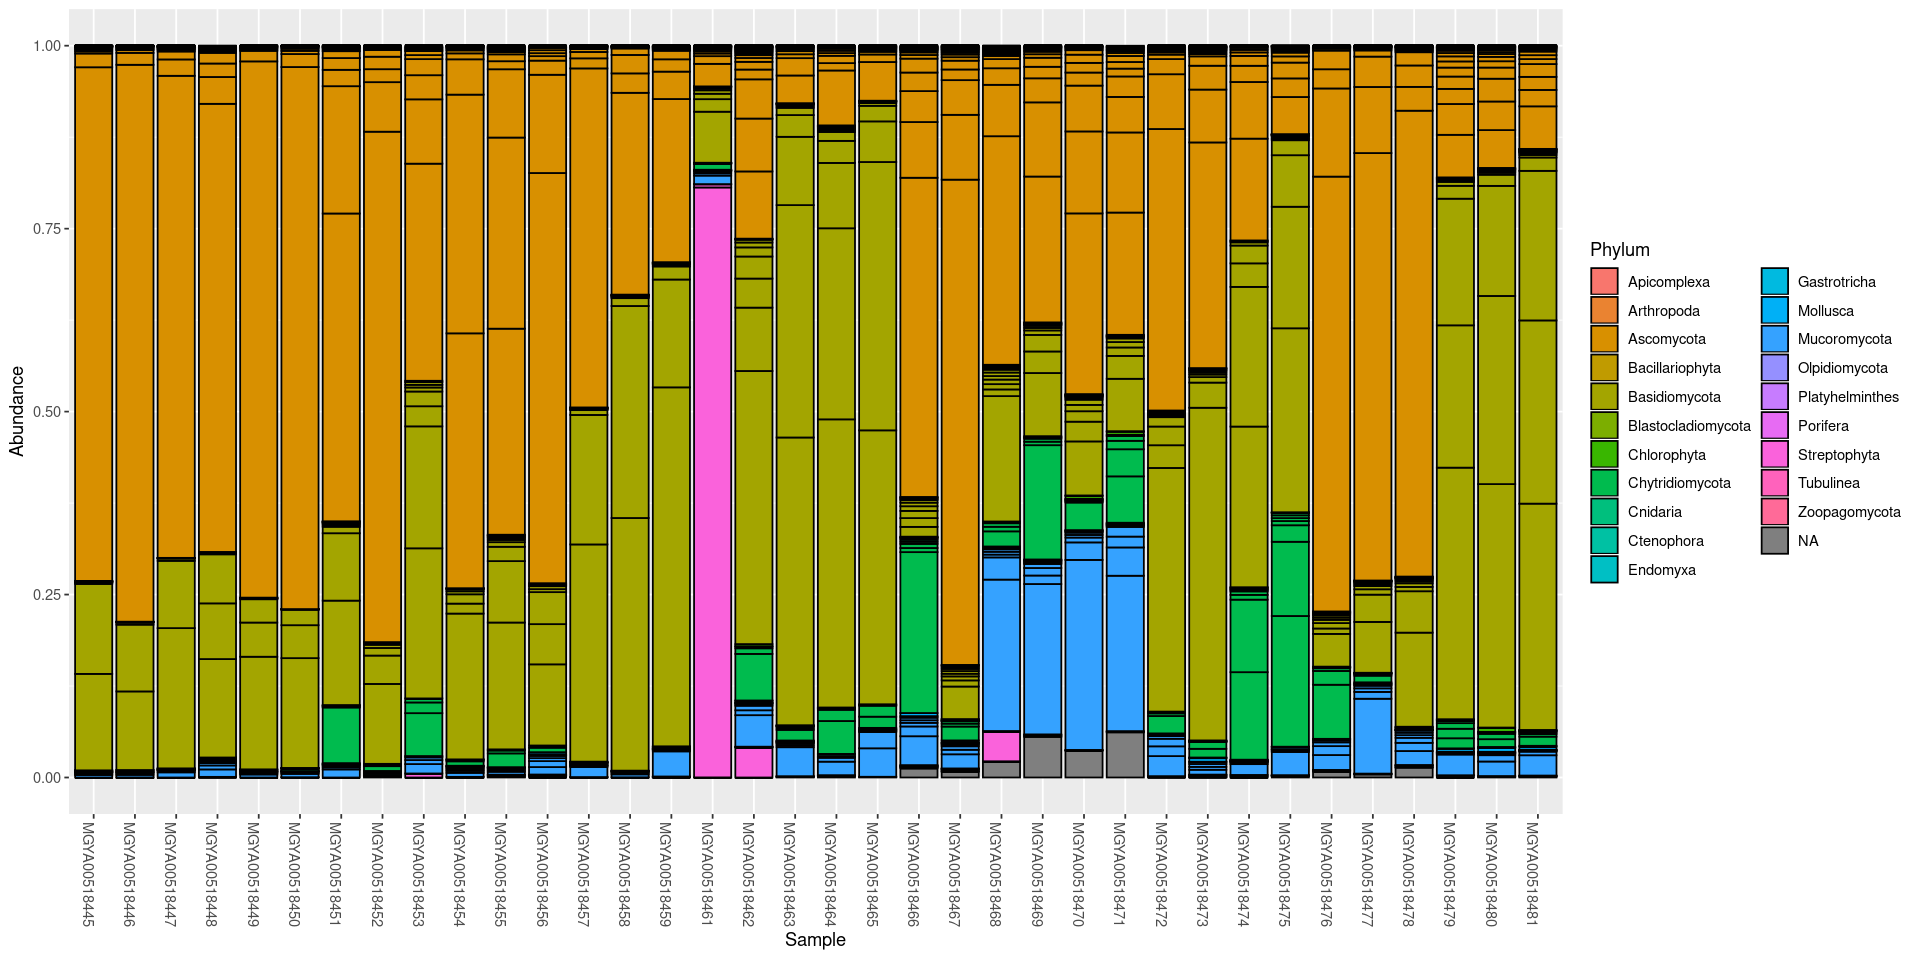

In [36]:
# Transformations of abundances 
psglom <- tax_glom(ps, "Order")
normed_ps <- transform_sample_counts(psglom, function(x) x/sum(x))
plot_bar(normed_ps, fill="Phylum")

In [37]:
ord <- ordinate(ps, "NMDS", "bray")

Square root transformation
Wisconsin double standardization
Run 0 stress 0.2172241 
Run 1 stress 0.270438 
Run 2 stress 0.2285977 
Run 3 stress 0.2172809 
... Procrustes: rmse 0.007798736  max resid 0.03426817 
Run 4 stress 0.2172241 
... Procrustes: rmse 2.290567e-05  max resid 6.825233e-05 
... Similar to previous best
Run 5 stress 0.2172241 
... Procrustes: rmse 1.408455e-05  max resid 4.073797e-05 
... Similar to previous best
Run 6 stress 0.2768314 
Run 7 stress 0.238888 
Run 8 stress 0.2271696 
Run 9 stress 0.2412334 
Run 10 stress 0.2667735 
Run 11 stress 0.2426231 
Run 12 stress 0.2180891 
Run 13 stress 0.241296 
Run 14 stress 0.2465867 
Run 15 stress 0.2184797 
Run 16 stress 0.2180969 
Run 17 stress 0.2498001 
Run 18 stress 0.2557721 
Run 19 stress 0.2824374 
Run 20 stress 0.2180969 
*** Solution reached


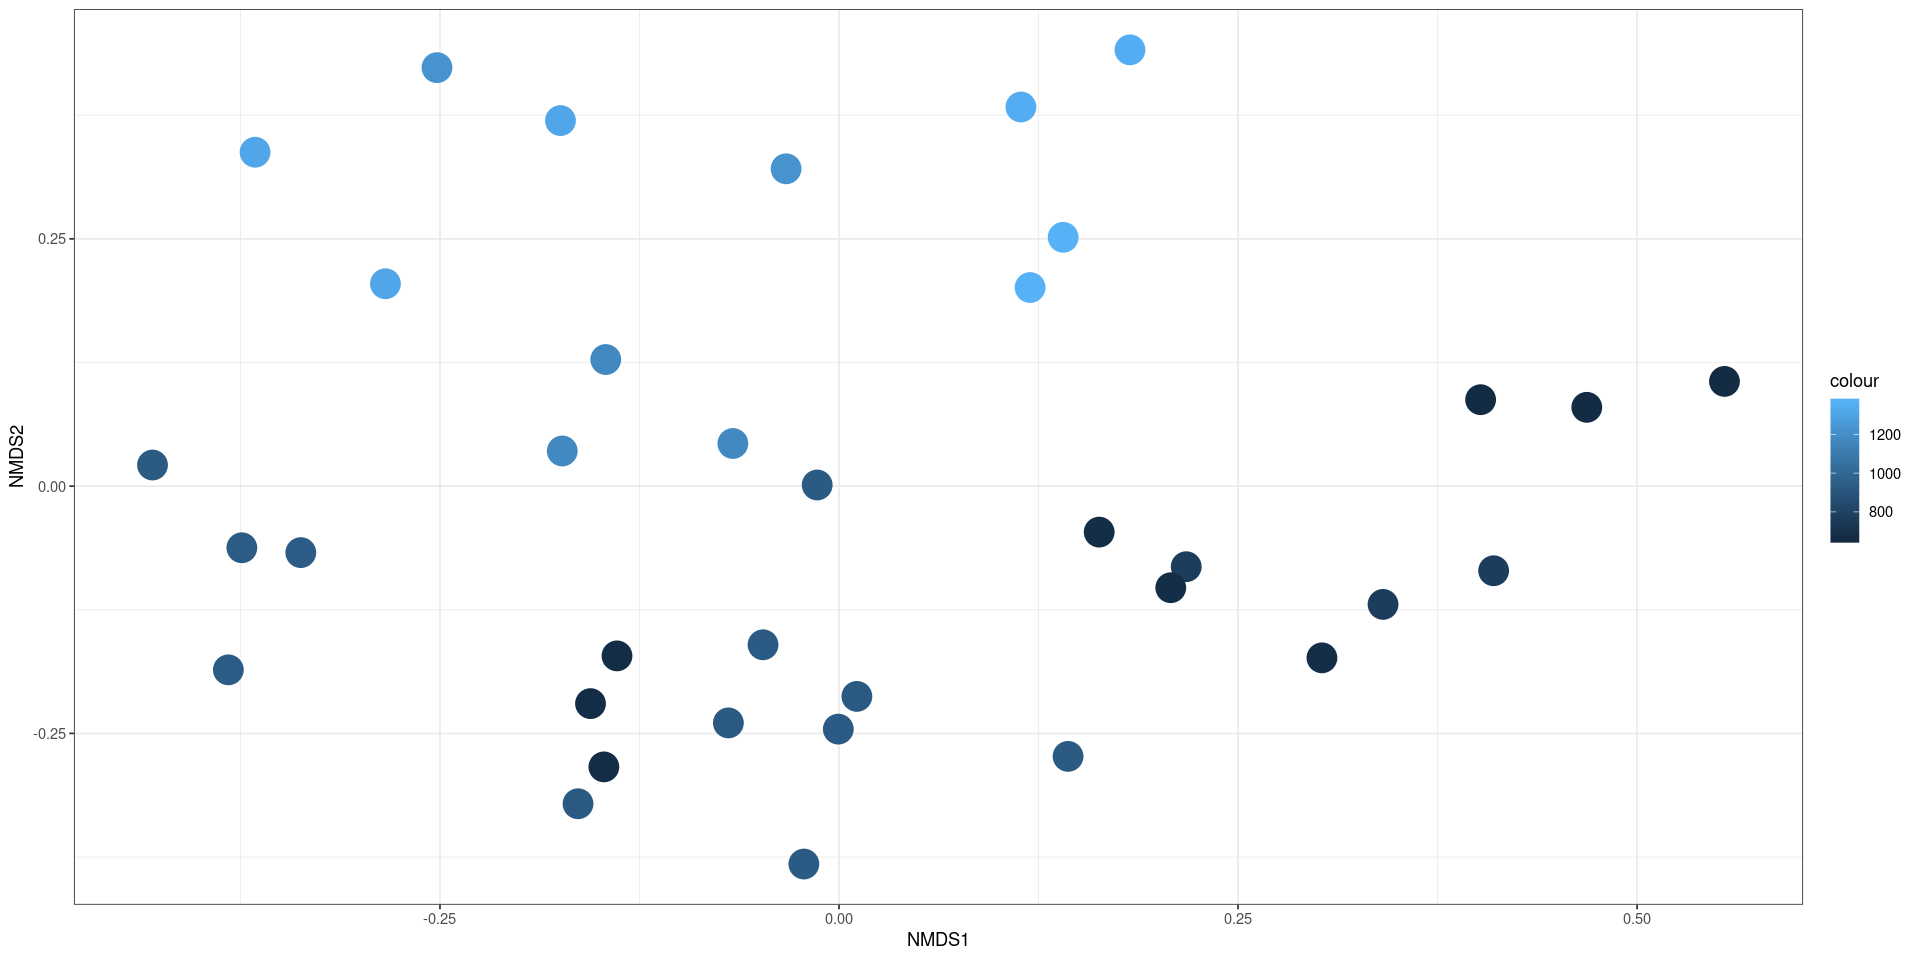

In [39]:
plot_ordination(ps, ord) + 
    geom_point(aes(color=as.numeric(sample_elevation)), size=8) + 
    theme_bw()

## 5 -  `mgnify_get_analyses_results`

   - Retrieve functional results from API
   - Taxonomy also available 
      - not OTU based
      

   - `mgnify_get_analyses_results(client, accessions, retrievelist) `
       - `retrievelist` : Which results do you want?
        - availability depends on pipeline and experiment type.
        

   - Returns a list of functional result `data.frames`.
   

In [40]:
acc_list <- metadata$analysis_accession[metadata$`analysis_experiment-type` == "assembly"]
func_results <- mgnify_get_analyses_results(mg, acc_list, retrievelist = c("go-slim", "taxonomy-ssu") )

  |======================================================================| 100%


In [41]:
names(func_results)

[1] "go-slim"      "taxonomy-ssu"

In [42]:
func_results$`go-slim`

accession,description,lineage,MGYA00520940,MGYA00520966,MGYA00521001,MGYA00521025,MGYA00521063,MGYA00521064,MGYA00521126,MGYA00521127,MGYA00521190,MGYA00521191,MGYA00521216,MGYA00521217,MGYA00521258,MGYA00521259,MGYA00521311,MGYA00521312
<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
GO:0000015,phosphopyruvate hydratase complex,cellular_component,3,2,1,1,4,0,1,9,1,1,1,1,7,2,2,3
GO:0000150,recombinase activity,molecular_function,7,0,2,3,13,9,5,7,0,14,14,5,16,14,16,11
GO:0000160,phosphorelay signal transduction system,biological_process,79,3,34,0,11,1,59,57,3,92,4,9,65,65,62,85
GO:0000166,nucleotide binding,molecular_function,718,171,272,160,708,104,477,1298,162,827,330,155,1137,822,821,993
GO:0003674,molecular function,molecular_function,149,42,55,97,86,25,102,123,28,170,79,80,242,123,150,206
GO:0003676,nucleic acid binding,molecular_function,760,164,302,227,763,217,528,1155,157,943,519,237,1099,889,1024,1000
GO:0003700,"transcription factor activity, sequence-specific DNA binding",molecular_function,163,4,76,19,38,9,135,114,7,219,20,25,192,153,132,217
GO:0003735,structural constituent of ribosome,molecular_function,95,74,45,58,197,17,68,302,54,70,100,35,225,122,141,141
GO:0003824,catalytic activity,molecular_function,583,52,220,60,348,37,335,580,49,649,144,71,640,589,544,702


In [43]:
func_results$`taxonomy-ssu`

order,super.kingdom,class,family,kingdom,phylum,genus,species,MGYA00520940,MGYA00520966,⋯,MGYA00521126,MGYA00521127,MGYA00521190,MGYA00521191,MGYA00521216,MGYA00521217,MGYA00521258,MGYA00521259,MGYA00521311,MGYA00521312
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
,Chloroplast,,,,,,Solanum_commersonii_(Commerson's_wild_potato),0,1,⋯,0,0,0,0,0,0,0,0,0,0
Bacillales,Bacteria,Bacilli,Paenibacillaceae,,Firmicutes,Paenibacillus,NA,0,0,⋯,0,0,0,0,1,0,0,0,0,0
Bacillales,Bacteria,Bacilli,Staphylococcaceae,,Firmicutes,Staphylococcus,NA,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Bacteroidales,Bacteria,Bacteroidia,Bacteroidaceae,,Bacteroidetes,Bacteroides,NA,0,0,⋯,0,0,0,0,0,0,1,0,0,0
Bacteroidales,Bacteria,Bacteroidia,Dysgonamonadaceae,,Bacteroidetes,NA,NA,0,0,⋯,0,0,0,0,0,0,0,1,0,0
Bacteroidales,Bacteria,Bacteroidia,Prevotellaceae,,Bacteroidetes,NA,NA,0,0,⋯,0,0,0,1,0,0,0,0,0,0
Bifidobacteriales,Bacteria,Actinobacteria,Bifidobacteriaceae,,Actinobacteria,NA,NA,0,0,⋯,0,0,0,0,0,0,0,0,0,1
Burkholderiales,Bacteria,Betaproteobacteria,Alcaligenaceae,,Proteobacteria,NA,NA,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Burkholderiales,Bacteria,Betaproteobacteria,Burkholderiaceae,,Proteobacteria,Lautropia,Lautropia_mirabilis,0,0,⋯,0,0,0,0,0,0,0,0,0,0


 - Can be **slow** - especially for Interpro.
 

 - Extra option - `bulk_dl`
    - Flag to retrieve per-study results
    - not always reliable
    - **Extremely** fast when it works
      - so try it - warnings will be issued

In [44]:
#This still using the local cache, but on a per-analysis basis
tmp <- mgnify_get_analyses_results(mg, acc_list, retrievelist = c("interpro-identifiers") )

  |======================================================================| 100%


In [45]:
tmp2 <- mgnify_get_analyses_results(mg, acc_list, retrievelist = c("interpro-identifiers"), bulk_dl=T )

  |======================================================================| 100%


In [46]:
head(tmp$`interpro-identifiers` == tmp2$`interpro-identifiers`)

accession,description,MGYA00520940,MGYA00520966,MGYA00521001,MGYA00521025,MGYA00521063,MGYA00521064,MGYA00521126,MGYA00521127,MGYA00521190,MGYA00521191,MGYA00521216,MGYA00521217,MGYA00521258,MGYA00521259,MGYA00521311,MGYA00521312
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


# 6 - `mgnify_download` - get raw results files.
  - Intended for retrieval of larger TSV and FASTA files
  - multistep process:
     - `mgnify_get_download_urls` - what's available
     - `mgnify_download` - Actually retrieve the file


- `mgnify_get_download_urls(client, accessions, accession_type)`
   - `accession_type` - `assemblies`, `analyses`, `studies` etc
   - Returns `data.frame` 
       -includes file type, format and location URL
       `download_url` is what you want.

In [47]:
dl_df <- mgnify_get_download_urls(mg, acc_list, "analyses")
head(dl_df)

  |======================================================================| 100%


type,id,attributes.alias,attributes.file.format.name,attributes.file.format.extension,attributes.file.format.compression,attributes.description.label,attributes.description.description,attributes.group.type,attributes.file.checksum.checksum,attributes.file.checksum.checksum.algorithm,relationships.pipeline.data.type,relationships.pipeline.data.id,relationships.pipeline.related,download_url,accession,accession_type
<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
analysis-job-downloads,ERZ809583_FASTA.fasta.gz,ERZ809583_FASTA.fasta.gz,FASTA,fasta,TRUE,Processed contigs,Processed contigs,Sequence data,,,pipelines,4.1,https://www.ebi.ac.uk/metagenomics/api/v1/pipelines/4.1?format=json,https://www.ebi.ac.uk/metagenomics/api/v1/analyses/MGYA00520940/file/ERZ809583_FASTA.fasta.gz,MGYA00520940,analyses
analysis-job-downloads,ERZ809583_FASTA_CDS_annotated.faa.gz,ERZ809583_FASTA_CDS_annotated.faa.gz,FASTA,fasta,TRUE,Predicted CDS with annotation,Predicted coding sequences with InterPro match (FASTA),Sequence data,,,pipelines,4.1,https://www.ebi.ac.uk/metagenomics/api/v1/pipelines/4.1?format=json,https://www.ebi.ac.uk/metagenomics/api/v1/analyses/MGYA00520940/file/ERZ809583_FASTA_CDS_annotated.faa.gz,MGYA00520940,analyses
analysis-job-downloads,ERZ809583_FASTA_CDS_unannotated.faa.gz,ERZ809583_FASTA_CDS_unannotated.faa.gz,FASTA,fasta,TRUE,Predicted CDS without annotation,Predicted CDS without annotation,Sequence data,,,pipelines,4.1,https://www.ebi.ac.uk/metagenomics/api/v1/pipelines/4.1?format=json,https://www.ebi.ac.uk/metagenomics/api/v1/analyses/MGYA00520940/file/ERZ809583_FASTA_CDS_unannotated.faa.gz,MGYA00520940,analyses
analysis-job-downloads,ERZ809583_FASTA_contigsWithpCDS.fasta.gz,ERZ809583_FASTA_contigsWithpCDS.fasta.gz,FASTA,fasta,TRUE,Processed contigs with pCDS,All contigs that have predicted CDS,Sequence data,,,pipelines,4.1,https://www.ebi.ac.uk/metagenomics/api/v1/pipelines/4.1?format=json,https://www.ebi.ac.uk/metagenomics/api/v1/analyses/MGYA00520940/file/ERZ809583_FASTA_contigsWithpCDS.fasta.gz,MGYA00520940,analyses
analysis-job-downloads,ERZ809583_FASTA_interproscan.fasta.gz,ERZ809583_FASTA_interproscan.fasta.gz,FASTA,fasta,TRUE,Processed contigs with annotation,All contigs with an interproscan match,Sequence data,,,pipelines,4.1,https://www.ebi.ac.uk/metagenomics/api/v1/pipelines/4.1?format=json,https://www.ebi.ac.uk/metagenomics/api/v1/analyses/MGYA00520940/file/ERZ809583_FASTA_interproscan.fasta.gz,MGYA00520940,analyses
analysis-job-downloads,ERZ809583_FASTA_noFunction.fasta.gz,ERZ809583_FASTA_noFunction.fasta.gz,FASTA,fasta,TRUE,Processed contigs without annotation,All contigs with a predicted CDS but no interproscan match,Sequence data,,,pipelines,4.1,https://www.ebi.ac.uk/metagenomics/api/v1/pipelines/4.1?format=json,https://www.ebi.ac.uk/metagenomics/api/v1/analyses/MGYA00520940/file/ERZ809583_FASTA_noFunction.fasta.gz,MGYA00520940,analyses


 - `mgnify_download(client, url, target_filename, readfunc)`
    - `target_filename` - where to store the downloaded file. Default to cache folder
    - `readfunc` - function to process file "inline".
    

 - Returns downloaded file location
    - in cache or `target_filename`

In [48]:
#Choosing a single file
analysis_subset = dl_df$accession == "MGYA00520940"
ftype_subset = dl_df$attributes.description.label == "Predicted ORF with annotation"


file_url = dl_df$download_url[analysis_subset & ftype_subset]

file_url

[1] "https://www.ebi.ac.uk/metagenomics/api/v1/analyses/MGYA00520940/file/ERZ809583_FASTA_ORF_annotated.ffn.gz"

In [49]:
mgnify_download(mg, file_url)

[1] "~/MyLocalMGnifyCache/analyses/MGYA00520940/file/ERZ809583_FASTA_ORF_annotated.ffn.gz"

In [51]:
(file_location <- mgnify_download(mg, file_url, target_filename = "~/Metagenomics/Proteins.fasta"))

[1] "~/Metagenomics/Proteins.fasta"

In [53]:
library(Biostrings)
readAAStringSet(file_location)

  A AAStringSet instance of length 9746
       width seq                                            names               
   [1]   885 ATGTTTACTAAAGCATTGAAAT...GAAATGGTTGACAGCAAATAA ERZ809583.1-NODE-...
   [2]   729 GTGATTAAAGATTTCTTTAAAG...ATTAAATCTATCGTTGGATAA ERZ809583.1-NODE-...
   [3]  1311 TTGAAACAGATTAAAACAACAT...ACTTGGGAACCATTAGAATAA ERZ809583.1-NODE-...
   [4]   594 ATGAATATTAACTTAAATGTTA...GATACTACTGGTGAAATGTAA ERZ809583.1-NODE-...
   [5]   252 ATGGCAGGATATCATTTAGATG...GAAGGTGGATATAGAAAATGA ERZ809583.1-NODE-...
   ...   ... ...
[9742]   507 CCAGGAGTGAACAACCAGCCCT...ACACCGCCGCCTCCTTACACC ERZ809583.7829-NO...
[9743]   135 GAAGAAGTGAACGTCATTACCT...ATGGGTACCCGTAGCGGTGAT ERZ809583.7830-NO...
[9744]   501 GTTGGGTGTGTTTGGGCGGCGG...CCCTTCACCAAACACACCCAA ERZ809583.7930-NO...
[9745]   249 TTGGTGATGGGCGCAACCTTCC...AGTCTTGAACACAGCGTCGGA ERZ809583.8020-NO...
[9746]   288 ACCGCTACCGGCGATGGTCTGT...ATACTGGCCTTGCAGGACAAA ERZ809583.8193-NO...

 # Wrapping up
 
  - Don't worry if you didn't follow it all.
     - Read the vignette
     

  - *Please* give feedback - `ben.allen@ncl.ac.uk`
   - Current structure biased to what I think is needed. 
    

  - Have a go at the exercises
    - but there's a lot to do...
  

It's a lot to take in at once
And clearly requires reasonable R abilities.